In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scienceplots
import networkx as nx
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

In [5]:
np.round(np.arange(0.1,4,0.2),1)

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9])

In [43]:
# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Time Scale
step_size   = 1e-10
amplitude   = 0.2
freq        = 20e7
N_voltages  = 2000
time        = step_size*np.arange(N_voltages)

voltages        = np.zeros(shape=(N_voltages,3))
voltages[:,0]   = amplitude*np.cos(freq*time)

In [66]:
vals1 = []
vals2 = []

for i in range(2000):

    np_network_cubic = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    np_network_cubic.run_var_voltages(voltages, time, target_electrode=1, eq_steps=0, save_th=0.1)
    vals1.append(np.array(np_network_cubic.charge_values_pos))
    vals2.append(np.array(np_network_cubic.charge_values_neg))

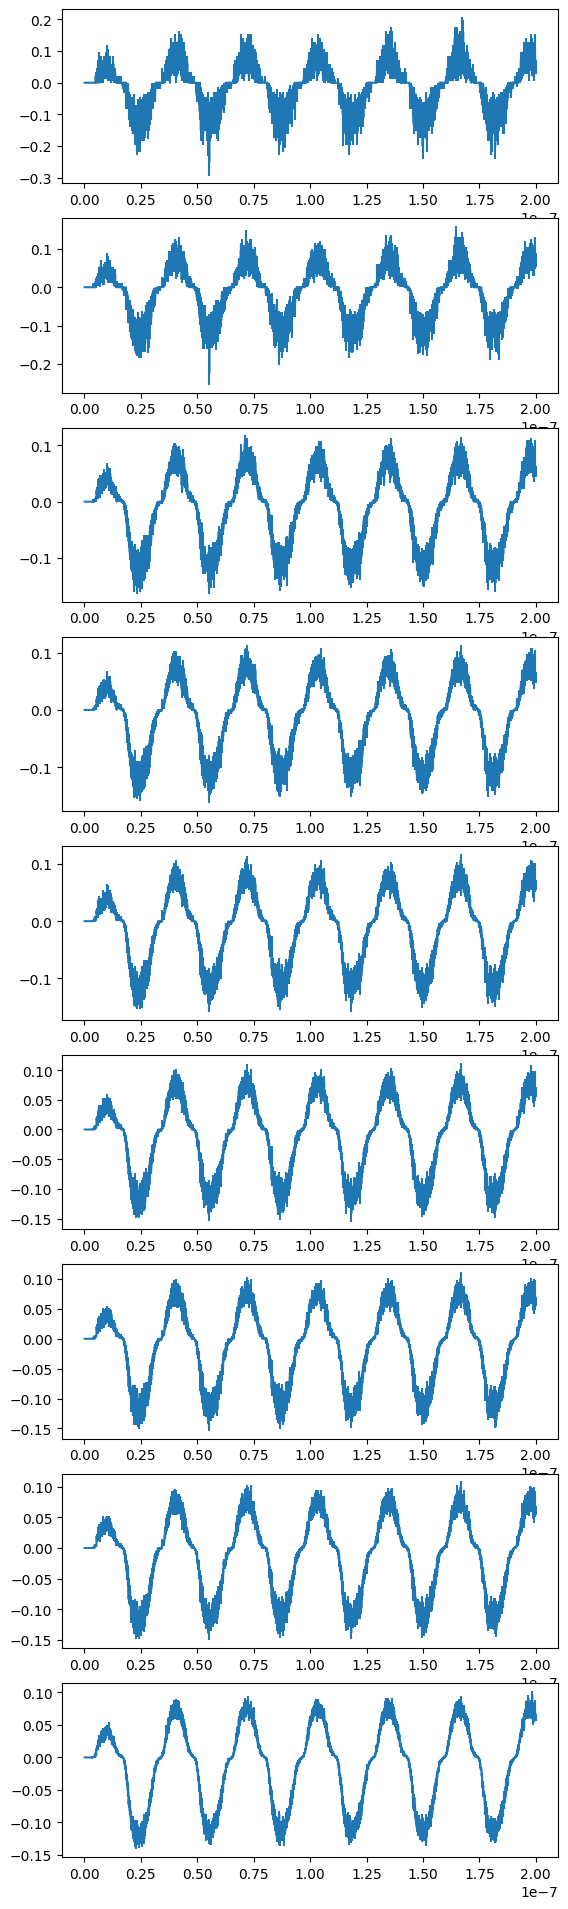

In [67]:
fig = plt.figure()
fig.set_figheight(fig.get_figheight()*5)

for i, n_stat in enumerate([100,200,500,600,700,800,900,1000,2000]): 

    ax = fig.add_subplot(9,1,i+1)
    ax.errorbar(time[1:], np.mean(np.array(vals1[:n_stat])-np.array(vals2[:n_stat]),axis=0), np.std(np.array(vals1[:n_stat])-np.array(vals2[:n_stat]),axis=0)/np.sqrt(n_stat))
# plt.xlim(time[450],time[500])

In [45]:
np_network_cubic.return_output_values()

array([[0., 6., 0., 0.],
       [0., 6., 0., 0.],
       [0., 5., 0., 0.],
       ...,
       [0., 4., 0., 0.],
       [0., 6., 0., 0.],
       [0., 3., 0., 0.]])

In [46]:
np_network_cubic.return_charge_vector()

array([0.27551335, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

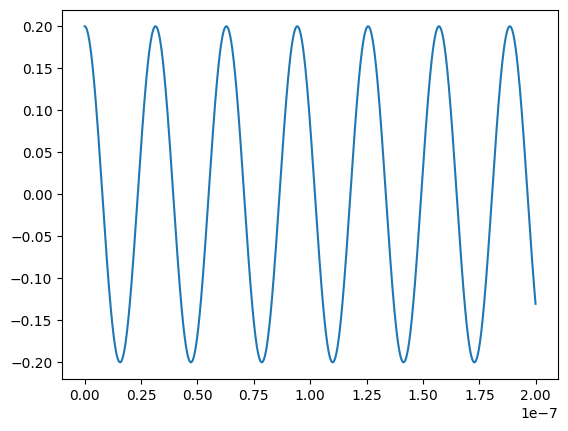

In [37]:
plt.plot(time, voltages[:,0])

In [34]:
np_network_cubic.charge_values

AttributeError: 'simulation' object has no attribute 'charge_values'

In [6]:
t   = np.linspace(0,10,1000)
q   = np.sin(t)
dq  = q[1:] - q[:-1]
dt  = t[1:] - t[:-1]

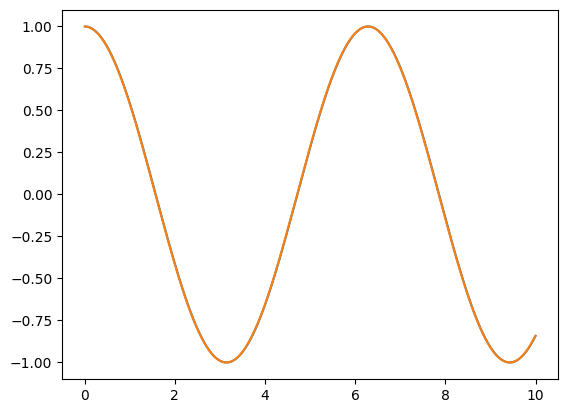

In [12]:
# plt.plot(t, q)
plt.plot(t[1:], dq/dt)
plt.plot(t, np.gradient(q)/np.gradient(t))

In [13]:
np.gradient(q)

array([ 1.00098428e-02,  1.00093414e-02,  1.00078369e-02,  1.00053297e-02,
        1.00018200e-02,  9.99730809e-03,  9.99179446e-03,  9.98527966e-03,
        9.97776434e-03,  9.96924924e-03,  9.95973524e-03,  9.94922328e-03,
        9.93771441e-03,  9.92520978e-03,  9.91171066e-03,  9.89721838e-03,
        9.88173441e-03,  9.86526030e-03,  9.84779769e-03,  9.82934834e-03,
        9.80991410e-03,  9.78949690e-03,  9.76809880e-03,  9.74572195e-03,
        9.72236858e-03,  9.69804103e-03,  9.67274174e-03,  9.64647325e-03,
        9.61923819e-03,  9.59103929e-03,  9.56187937e-03,  9.53176135e-03,
        9.50068826e-03,  9.46866320e-03,  9.43568939e-03,  9.40177012e-03,
        9.36690881e-03,  9.33110893e-03,  9.29437409e-03,  9.25670795e-03,
        9.21811429e-03,  9.17859699e-03,  9.13815999e-03,  9.09680736e-03,
        9.05454323e-03,  9.01137184e-03,  8.96729751e-03,  8.92232467e-03,
        8.87645781e-03,  8.82970154e-03,  8.78206054e-03,  8.73353958e-03,
        8.68414352e-03,  

In [22]:
np.gradient(t)

array([0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001001,
       0.01001001, 0.01001001, 0.01001001, 0.01001001, 0.01001

In [23]:
t[1] - t[0]

0.01001001001001001

In [24]:
(t[2] - t[0])/2

0.01001001001001001

In [15]:
q[1] - q[0]

0.010009842843179184

In [20]:
(q[2] - q[0])/2

0.010009341352736739

In [21]:
(q[3] - q[1])/2

0.010007836931658477

In [128]:
I = (q[1:] - q[:-1])/dt

In [129]:
I2 = (q[:-3] - 8*q[1:-2] + 8*q[2:-1] - q[3:])/12*dt

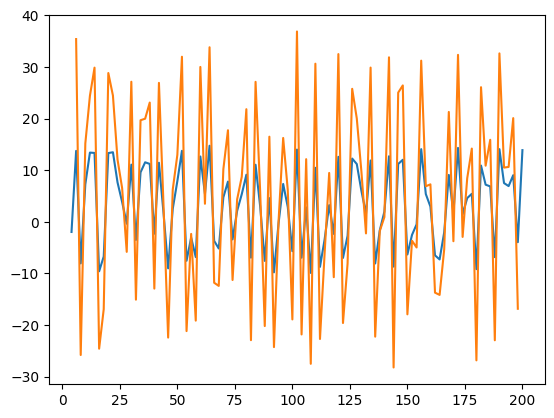

In [138]:
plt.plot(t[1:], I)
plt.plot(t[2:-1], I2)


In [79]:
I2 = []
for i in range(2,len(dq)-2):
    I2.append((-dq[i+2] + 8*dq[i+1] - 8*dq[i-1] + dq[i-2])/12*dt)

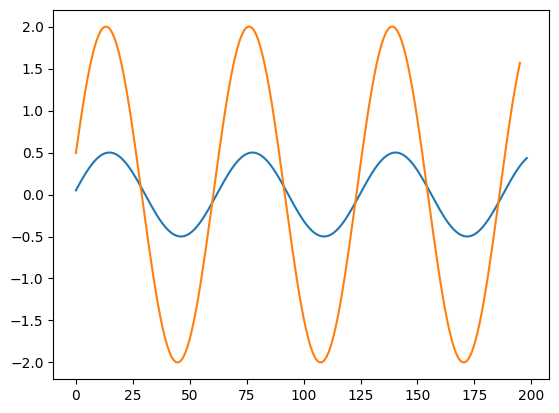

In [80]:
plt.plot(I)
plt.plot(I2)

In [32]:
I = dq/dt
I

array([25., 10., 15.,  5., 30., 35., 15., 10.,  5., 50.])

In [30]:
dqs

array([ 50,  70, 100, 110, 170, 240, 270, 290, 300, 400])

In [9]:
nanonets_utils.store_average_time_currents("scripts/2_funding_period/WP2/spatial_correlation/radius_corr/data/r_5/", 7, 7, 1, 2, 10, 10)

In [45]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[6,0,0],[0,3,0],[0,6,0],[6,3,0],[3,6,0],[6,6,0]]
}

# Nanoparticle Parameter
np_info = {
    "eps_r"         : 2.6,
    "eps_s"         : 3.9,
    "mean_radius"   : 10.0,
    "std_radius"    : 0.0,
    "np_distance"   : 1.0
}

# Nanoparticle Resistances
res_info = {
    "mean_R"    : 25.0,
    "std_R"     : 0.0    
}

# Save Folder
folder  = ""

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter, folder=folder, np_info=np_info, res_info=res_info)

(<Figure size 350x262.5 with 1 Axes>, <Axes: >)

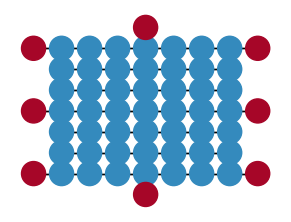

In [46]:
nanonets_utils.display_network(np_network_cubic)

In [47]:
pos = np_network_cubic.pos

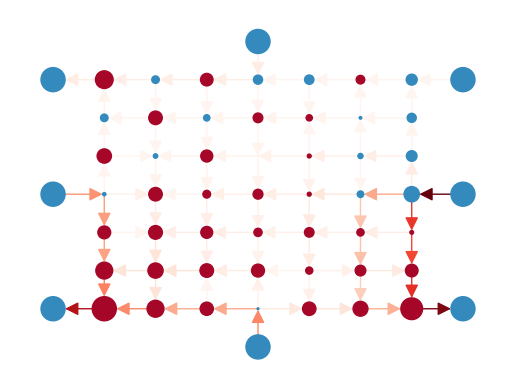

In [56]:
fig, ax = nanonets_utils.display_network_currents("/mnt/c/Users/jonas/Desktop/phd/data/system_size_new/net_currents_Nx=7_Ny=7_Nz=1_Ne=8.csv",
                                                row=80, N_electrodes=8, arrowsize=20, charge_landscape=True, node_size=300, pos=pos)
fig.savefig("net_plot.svg", transparent=True)

In [7]:
def display_network_currents(path : str, row, N_electrodes : int, charge_landscape=False, pos=None, fig=None, ax=None,
                             arrow_scale=2, arrowsize=12, node_size=300, blue_color='#348ABD', red_color='#A60628', position_by_currents=False):

    if fig == None:
        fig = plt.figure()
    if ax == None:
        ax = fig.add_subplot()
        
    ax.axis('off')

    df          = pd.read_csv(path)
    values      = df.loc[row,:].values
    junctions   = np.array([eval(val) for val in df.columns])

    values_new      = []
    junctions_new   = []

    for n1, junction in enumerate(junctions):

        i       = junction[0]
        j       = junction[1]
        val1    = values[n1]
        n2      = np.where(((junctions[:,0]==j) & (junctions[:,1]==i)))[0][0]

        if n2 > n1:
            
            val2  = values[n2]
            values_new.append(np.abs(val2-val1))
            
            if val1 > val2:
                junctions_new.append([i-N_electrodes,j-N_electrodes])
            else:
                junctions_new.append([j-N_electrodes,i-N_electrodes])

    values_new = arrow_scale*(values_new - np.min(values_new))/(np.max(values_new) - np.min(values_new))

    G = nx.DiGraph()
    G.add_nodes_from(np.arange(np.min(junctions)-N_electrodes, np.max(junctions)+1-N_electrodes))

    if charge_landscape:
        states  = pd.read_csv(path.replace("net_currents", "mean_state")).loc[row,:].values
        colors  = np.repeat(blue_color, len(G.nodes)-N_electrodes)
        colors[np.where(states < 0)] = red_color
        colors  = np.insert(colors, 0, np.repeat(blue_color, N_electrodes))
        states  = np.abs(states)
        states  = node_size*(states - np.min(states))/(np.max(states)-np.min(states))
        states  = np.insert(states, 0, np.repeat(node_size, N_electrodes))
    else:
        states  = np.repeat(node_size, len(G.nodes))

    for val, junction in zip(values_new, junctions_new):

        G.add_edge(junction[0], junction[1], width=val)

    widths = [G[u][v]['width'] for u, v in G.edges]

    if pos == None:
        if position_by_currents:
            pos = nx.kamada_kawai_layout(G=G, weight='width')
        else:
            pos = nx.kamada_kawai_layout(G=G)
    else:
        keys        = [-i for i in range(1, N_electrodes+1)]
        key_vals    = [pos[i] for i in keys]
        new_keys    = keys[::-1]

        for key in keys:
            pos.pop(key)
        
        for i, key in enumerate(new_keys):
            pos[key] = key_vals[i]

    nx.draw(G=G, pos=pos, ax=ax, edge_color=widths, arrowsize=arrowsize, node_size=states, edge_cmap=plt.cm.Reds, node_color=colors)

    return fig, ax

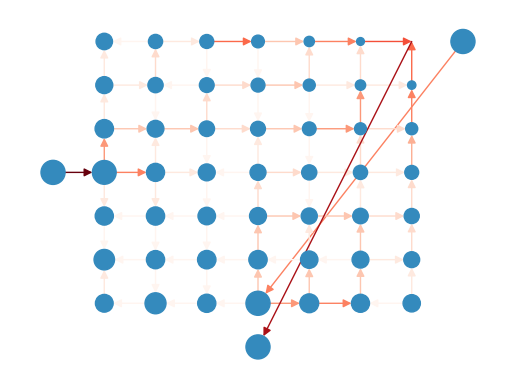

In [8]:
fig, ax = display_network_currents("scripts/2_funding_period/WP2/freq_double/uniform/data/net_currents_Nx=7_Ny=7_Nz=1_Ne=3.csv",
                            row=1, N_electrodes=3, arrow_scale=3, charge_landscape=True, node_size=300,
                            position_by_currents=False, pos=np_network_cubic.pos)

In [9]:
def display_landscape(path : str, row, Nx, Ny, fig=None, ax=None, cmap='coolwarm', vmin=None, vmax=None,
                        x_label='$x_{NP}$', y_label='$x_{NP}$'):

    arr = pd.read_csv(path).loc[row,:].values
    arr = arr.reshape(Nx, Ny)
    
    if fig == None:
        fig = plt.figure()
    if ax == None:
        ax = fig.add_subplot()
    
    ax.imshow(arr, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    return fig, ax